<a href="https://colab.research.google.com/github/philipayazi/Disaster_Tweets/blob/master/Tweet_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_punctuation,strip_multiple_whitespaces,remove_stopwords
import pandas as pd
from gensim.corpora import Dictionary
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
from scipy.stats import randint

from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_punctuation,strip_multiple_whitespaces,remove_stopwords
from gensim.corpora import Dictionary

import xgboost as xgb


In [ ]:
# read data from github

url = "https://github.com/philipayazi/Disaster_Tweets/raw/master/nlp-getting-started/train.csv"
train_df = pd.read_csv(url)

In [ ]:
# observe how the data looks
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# clean tweets of white spaces, punctuations, stopwords, and make all letters lowercase
custom_filters = [lambda x: x.lower(),
                  strip_multiple_whitespaces,
                  strip_punctuation,
                  remove_stopwords]

def clean_string(row):
    return preprocess_string(row['text'], custom_filters)

In [ ]:
# append cleaned tweets to dataframe
train_df['cleaned_tweets'] = train_df.apply(clean_string, axis=1)

train_df.head()

,id,keyword,location,text,target,cleaned_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, allah, forgive]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, wildfires, evacuati..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
# convert cleaned_tweets column to a list so that we can create a 2D array
# cleaned_tweets_lst = train_df['cleaned_tweets'].to_list()

In [ ]:
# make cleaned_tweets_lst a list of lists i.e. a 2D array
# cleaned_tweets_lst = [' '.join(cleaned_tweet) for cleaned_tweet in cleaned_tweets_lst]

In [ ]:
# convert cleaned_tweets column to dictionary
# dct = Dictionary(train_df.cleaned_tweets)

In [ ]:
# convert dictionary to matrix
# gen_corpus = [dct.doc2bow(line) for line in train_df.cleaned_tweets]

In [ ]:
# gen_corpus[:5]

In [ ]:
# create model
from gensim.models import TfidfModel
# td_model = TfidfModel(gen_corpus)

In [ ]:
# model

In [ ]:
# fit model
# vector = model[corpus]

In [ ]:
# print(vector)

In [ ]:
# vector_0 = model[corpus[0]]

In [ ]:
# vector_1 = model[corpus[1]]

In [ ]:
# The above code does not seem to be correct because it is treating redundent words as unique. Create dictionary of
# frequency counts of unique words
# from collections import defaultdict
# frequency = defaultdict(int)
# for text in train_df.cleaned_tweets:
#     for token in text:
#         frequency[token] += 1

In [ ]:
# convert default dictionary to dictionary
# frequency = dict(frequency)

#EDA of Data Set

In [ ]:
# Determine if training data set is balanced
target_count = train_df.groupby('target').count().drop(columns = ['id', 'keyword', 'location', 'text'], axis=1)

In [ ]:
# Data shows 57% to 43% disaster non related to related tweets
target_count

,cleaned_tweets,corpus
target,,
0,4342,4342
1,3271,3271


In [ ]:
target_pct = round(target_count.div(target_count['cleaned_tweets'].sum()) * 100, 2)

In [ ]:
target_pct = target_pct.rename(columns={'cleaned_tweets': "percent"})

In [ ]:
target_pct = target_pct.reset_index()

In [ ]:
target_pct = target_pct.replace({"target":{0: "False", 1: "True"}})

In [ ]:
from matplotlib import pyplot as plt    

fig = plt.figure(figsize=(10,10))
plt.bar(target_pct['target'], target_pct['percent'])
fig.suptitle('Percentage of True vs False Classificatins \n of Tweets Related to Disasters', fontsize=20, y=.95)
plt.xlabel('Disaster', fontsize=18)
plt.ylabel('Percentage of Tweets', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig('classification_balance.png')

#Split dat into TRAIN test TEST sets

In [ ]:
X_train_list, X_test_list, y_train_list, y_test_list = train_test_split(cleaned_tweets_lst, initial_df['target'], test_size =0.3, random_state =42)

# All of these analyses are on dense vectors. We need to analyze sparse vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(cleaned_tweets_lst, train_df['target'], test_size = 0.3, random_state = 42)

In [ ]:
train_corpus = X_train_split

train_vectorizer = CountVectorizer()

X_train = train_vectorizer.fit_transform(train_corpus)

In [ ]:
test_corpus = X_test_split

X_test = train_vectorizer.transform(test_corpus)

In [ ]:
X_train_shaped = X_train.shape

X_train_shaped

(5329, 16712)

In [ ]:
X_test_shaped = X_test.shape

X_test_shaped

(2284, 16712)

In [ ]:
train_vectorizer.vocabulary_

In [ ]:
feature_names = train_vectorizer.get_feature_names()

In [ ]:
sparse_vectors = X_train.toarray()

In [ ]:
sparse_vectors[0]

# Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
# model = LogisticRegression().fit(X_train, y_train_split)

In [ ]:
# model.score(X_train, y_train_split)

0.9711015199849878

In [ ]:
# model.predict(X_test)

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
# model.score(X_test, y_test_split)

0.7981611208406305

## Feature Engieering via "CountVectorizer"  

- From List to Matrix via "CountVectorizer" 

- List shape: N_tweets x 1
- Matrix shape: N_tweets x N_WordsInCorpus

In [ ]:
train_vectorizer = CountVectorizer()
Xcv_train_matrix = train_vectorizer.fit_transform(X_train_list)
Xcv_test_matrix = train_vectorizer.transform(X_test_list)

In [ ]:
# # Scale feature data (most likely not needed for CV features)

# x_scaler = StandardScaler(with_mean=False).fit(Xcv_train_matrix)

# Xcv_train_matrix = x_scaler.transform(Xcv_train_matrix)
# Xcv_test_matrix = x_scaler.transform(Xcv_test_matrix)

In [ ]:
print('Train matrix shape', Xcv_train_matrix.shape)
print('Test matrix shape', Xcv_test_matrix.shape)

In [ ]:
feature_names = train_vectorizer.get_feature_names()
#print(feature_names)
train_vectorizer.vocabulary_


In [ ]:
sparse_vectors = Xcv_train_matrix.toarray()

Tweet_nbr =0;
Word_nbr =1820;  #e.g., 1820 = 'australia'

sparse_vectors[0,1820]  # we get ones (or twos) at the right place

## Features: CountVectorizer, Classifier: Logistic Regression

In [ ]:
model_CV_LR =LogisticRegression(n_jobs=-1).fit(Xcv_train_matrix, y_train_list)

CV_LR_score_train =model_CV_LR.score(Xcv_train_matrix, y_train_list)
#model_LR.predict(Xcv_test_matrix)
CV_LR_score_test =model_CV_LR.score(Xcv_test_matrix, y_test_list)

print('score for test data:', CV_LR_score_test)
print(classification_report(y_test_list, model_CV_LR.predict(Xcv_test_matrix)) )

NameError: name 'LogisticRegression' is not defined

## Features: TFIDF,  Classifier: Logistic Regression

In [ ]:
train_vectorizer = TfidfVectorizer()

In [ ]:
Xtf_train_matrix = train_vectorizer.fit_transform(X_train_list)
Xtf_test_matrix = train_vectorizer.transform(X_test_list)

In [ ]:
# # Scale feature data (most likely not needed for CV features)
# x_scaler = StandardScaler(with_mean=False).fit(Xtf_train_matrix)

# Xtf_train_matrix = x_scaler.transform(Xtf_train_matrix)
# Xtf_test_matrix = x_scaler.transform(Xtf_test_matrix)

In [ ]:
print('Train matrix shape', Xtf_train_matrix.shape)
print('Test matrix shape', Xtf_test_matrix.shape)

In [ ]:
Xtf_train_matrix[0,1820]

In [ ]:
Xtf_train_matrix[0,276]  #w/out scaling was: 0.19644613494912055

In [ ]:
feature_names = train_vectorizer.get_feature_names()
## print(feature_names)
train_vectorizer.vocabulary_

In [ ]:
model_TF_LR =LogisticRegression(n_jobs=-1).fit(Xtf_train_matrix, y_train_list)

In [ ]:
TF_LR_score_train =model_TF_LR.score(Xtf_train_matrix, y_train_list)

TF_LR_score_test =model_TF_LR.score(Xtf_test_matrix, y_test_list)

print('score for test data:', TF_LR_score_test)
print(classification_report(y_test_list, model_TF_LR.predict(Xtf_test_matrix)) )

## Features: TFIDF,  Classifier: Randon Forest

In [ ]:
model_TF_RF =RandomForestClassifier(n_jobs=-1).fit(Xtf_train_matrix, y_train_list)

In [ ]:
TF_RF_score_train =model_TF_RF.score(Xtf_train_matrix, y_train_list)

TF_RF_score_test =model_TF_RF.score(Xtf_test_matrix, y_test_list)

print('score for test data:', TF_RF_score_test)
print(classification_report(y_test_list, model_TF_RF.predict(Xtf_test_matrix)) )

In [ ]:
model_TF_RF.feature_importances_

In [ ]:
feat_sortedlist =sorted(zip(model_TF_RF.feature_importances_, feature_names), reverse=True)

# top 10 features
feat_sortedlist[0:12]

## Features: TFIDF,  Classifier: XGBooster

In [ ]:
model_TF_XGB = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)
model_TF_XGB.fit(Xtf_train_matrix, y_train_list)

In [ ]:
y_pred = model_TF_XGB.predict(Xtf_test_matrix)
#print(confusion_matrix(y_test_list, y_pred))

TF_XGB_score_train =model_TF_XGB.score(Xtf_train_matrix, y_train_list)
TF_XGB_score_test =model_TF_XGB.score(Xtf_test_matrix, y_test_list)

print('score for test data:', TF_XGB_score_test)
print(classification_report(y_test_list, model_TF_XGB.predict(Xtf_test_matrix)) )

## Features: CountVectorizer,  Classifier: XGBooster

In [ ]:
model_CV_XGB = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)
model_CV_XGB.fit(Xcv_train_matrix, y_train_list)

In [ ]:
y_pred = model_TF_XGB.predict(Xcv_test_matrix)
#print(confusion_matrix(y_test_list, y_pred))

CV_XGB_score_train =model_CV_XGB.score(Xcv_train_matrix, y_train_list)
CV_XGB_score_test =model_CV_XGB.score(Xcv_test_matrix, y_test_list)

print('score for test data:', CV_XGB_score_test)
print(classification_report(y_test_list, model_CV_XGB.predict(Xcv_test_matrix)) )

## Features: CountVectorizer,  Classifier: Randon Forest

In [ ]:
CV_RF_score_train =model_CV_RF.score(Xcv_train_matrix, y_train_list)

CV_RF_score_test =model_CV_RF.score(Xcv_test_matrix, y_test_list)

print('score for test data:', CV_RF_score_test)
print(classification_report(y_test_list, model_CV_RF.predict(Xcv_test_matrix)) )

NameError: name 'model_CV_RF' is not defined

## Summary of results so far

In [ ]:
print('--------- CV features ------------------------')
print('score for CV->LR:', CV_LR_score_test)
print('score for CV->RF:', CV_RF_score_test)
print('score for CV->XGB:', CV_XGB_score_test)

print('--------- TFIDF features ---------------------')
print('score for TF->LR:', TF_LR_score_test)
print('score for TF->RF:', TF_RF_score_test)
print('score for TF->XGB:', TF_XGB_score_test)


## Tune CV+LR  --- HyperParameter tuning via "GridSearch"

In [ ]:
model =LogisticRegression(n_jobs=-1)    # gstmodel: grid search tuned model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
param_grid = {'C': [.1, .2, .5, 1, 2, 3, 5, 10], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear']} 

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

grid.fit(Xcv_train_matrix, y_train_list)

print(grid.best_params_)

# score with the tuned model
GST_CV_LR_score_test =grid.score(Xcv_test_matrix, y_test_list)
print(GST_CV_LR_score_test)

# # Calculate classification report for Tuned Model
# predictions = grid.predict(Xcv_test_matrix)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=["blue", "red"]))

In [ ]:
print(classification_report(y_test_list, grid.predict(Xcv_test_matrix)) )

## Tune TF+LR  --- HyperParameter tuning via "GridSearch"

In [ ]:
model =LogisticRegression(n_jobs=-1)    
param_grid = {'C': [.1, .2, .5, 1, 2, 3, 5, 10], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear']} 
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)
grid.fit(Xtf_train_matrix, y_train_list)
print(grid.best_params_)

# score with the tuned model
GST_TF_LR_score_test =grid.score(Xtf_test_matrix, y_test_list)
print(GST_TF_LR_score_test)

In [ ]:
print(classification_report(y_test_list, grid.predict(Xtf_test_matrix)) )

## Tune CV+RF  --- HyperParameter tuning via "GridSearch"

In [ ]:
model =RandomForestClassifier(n_jobs=-1)    

param_grid = {'n_estimators': [50, 100],     
              'max_features': ['sqrt', 'log2']} 
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

grid.fit(Xcv_train_matrix, y_train_list)

print(grid.best_params_)

# score with the tuned model
GST_CV_RF_score_test =grid.score(Xcv_test_matrix, y_test_list)

print(GST_CV_RF_score_test)

In [ ]:
print(classification_report(y_test_list, grid.predict(Xcv_test_matrix)) )

## Tune TF+RF  --- HyperParameter tuning via "GridSearch"

In [ ]:
model =RandomForestClassifier(n_jobs=-1)    

param_grid = {'n_estimators': [50, 100],     
              'max_features': ['sqrt', 'log2']} 
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

grid.fit(Xtf_train_matrix, y_train_list)

print(grid.best_params_)

# score with the tuned model
GST_TF_RF_score_test =grid.score(Xtf_test_matrix, y_test_list)

print(GST_TF_RF_score_test)

In [ ]:
print(classification_report(y_test_list, grid.predict(Xtf_test_matrix)) )

NameError: name 'classification_report' is not defined

## Tune CV+XGB  --- HyperParameter tuning via "GridSearch"

In [ ]:
model = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)
model

In [ ]:
param_grid = {'n_estimators': [100, 150],   
              'learning_rate': ['.1', '.3']} 

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

grid.fit(Xcv_train_matrix, y_train_list)

print(grid.best_params_)

# score with the tuned model
GST_CV_XGB_score_test =grid.score(Xcv_test_matrix, y_test_list)

print(GST_CV_XGB_score_test)

In [ ]:
print(classification_report(y_test_list, grid.predict(Xcv_test_matrix)) )

## Tune TF+XGB  --- HyperParameter tuning via "GridSearch"

In [ ]:
model = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)
model

In [ ]:
param_grid = {'n_estimators': [100, 150],   
              'learning_rate': ['.1', '.3']} 

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

grid.fit(Xtf_train_matrix, y_train_list)

print(grid.best_params_)

# score with the tuned model
GST_TF_XGB_score_test =grid.score(Xtf_test_matrix, y_test_list)

print(GST_TF_XGB_score_test)

In [ ]:
print(classification_report(y_test_list, grid.predict(Xtf_test_matrix)) )

## Results

In [ ]:
print(' ')
print('*** Default Params')
print('--------- CV features ------------------------')
print('score for CV->LR:', CV_LR_score_test)
print('score for CV->RF:', CV_RF_score_test)
print('score for CV->XGB:', CV_XGB_score_test)

print('--------- TFIDF features ---------------------')
print('score for TF->LR:', TF_LR_score_test)
print('score for TF->RF:', TF_RF_score_test)
print('score for TF->XGB:', TF_XGB_score_test)

In [ ]:
print(' ')
print('*** Optimized Params via GridSearchCV')

print('--------- CV features ------------------------')
print('score for GST_CV->LR:', GST_CV_LR_score_test)
print('score for GST_CV->RF:', GST_CV_RF_score_test)
print('score for GST_CV->XGB:', GST_CV_XGB_score_test)

print('--------- TFIDF features ---------------------')
print('score for GST_TF->LR:', GST_TF_LR_score_test)
print('score for GST_TF->RF:', GST_TF_RF_score_test)
print('score for GST_TF->XGB:', GST_TF_XGB_score_test)

## HyperParameter tuning via "RandomizedSearchCV"

### CV+LR 

In [ ]:
model =LogisticRegression(n_jobs=-1)
# Create the GridSearch estimator along with a parameter object containing the values to adjust
dist = dict(C=uniform(loc=0, scale=4), solver =['newton-cg', 'lbfgs', 'liblinear'])
mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xcv_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_CV_LR_score_test =srch.score(Xcv_test_matrix, y_test_list)
print(RST_CV_LR_score_test)

In [ ]:
print(classification_report(y_test_list, srch.predict(Xcv_test_matrix)) )

NameError: name 'classification_report' is not defined

### TF+LR

In [ ]:
model =LogisticRegression(n_jobs=-1)
# Create the GridSearch estimator along with a parameter object containing the values to adjust
dist = dict(C=uniform(loc=0, scale=4), solver =['newton-cg', 'lbfgs', 'liblinear'])
mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xtf_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_TF_LR_score_test =srch.score(Xtf_test_matrix, y_test_list)
print(RST_TF_LR_score_test)

In [ ]:
print(classification_report(y_test_list, srch.predict(Xtf_test_matrix)) )

### CV+RF

In [ ]:
model =RandomForestClassifier()

dist = dict(n_estimators = randint(1,200), max_features =['sqrt', 'log2'])

mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xcv_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_CV_RF_score_test =srch.score(Xcv_test_matrix, y_test_list)
print(RST_CV_RF_score_test)

In [ ]:
print(classification_report(y_test_list, srch.predict(Xcv_test_matrix)) )

### TF+RF

In [ ]:
model =RandomForestClassifier()

dist = dict(n_estimators = randint(1,200), max_features =['sqrt', 'log2'])

mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xtf_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_TF_RF_score_test =srch.score(Xtf_test_matrix, y_test_list)
print(RST_TF_RF_score_test)

In [ ]:
print(classification_report(y_test_list, srch.predict(Xtf_test_matrix)) )

### CV+XGB

In [ ]:
model =xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)

dist = dict(n_estimators = randint(1,300), learning_rate =uniform(loc=0.05, scale=.5))

mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xcv_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_CV_XGB_score_test =srch.score(Xcv_test_matrix, y_test_list)
print(RST_CV_XGB_score_test)

NameError: name 'xgb' is not defined

In [ ]:
print(classification_report(y_test_list, srch.predict(Xcv_test_matrix)) )

## TF+XGB 

In [ ]:
model =xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)

dist = dict(n_estimators = randint(1,300), learning_rate =uniform(loc=0.05, scale=.5))

mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xtf_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_TF_XGB_score_test =srch.score(Xtf_test_matrix, y_test_list)
print(RST_TF_XGB_score_test)

In [ ]:
print(classification_report(y_test_list, srch.predict(Xtf_test_matrix)) )

In [ ]:
y_pred =srch.predict(Xtf_test_matrix)
confusion_matrix(y_test_list, y_pred)

In [ ]:
print(' ')
print('*** Optimized Params via RandomizedSearchCV')

print('--------- CV features ------------------------')
print('score for RST_CV->LR:', RST_CV_LR_score_test)
print('score for RST_CV->RF:', RST_CV_RF_score_test)
print('score for RST_CV->XGB:', RST_CV_XGB_score_test)

print('--------- TFIDF features ---------------------')
print('score for RST_TF->LR:', RST_TF_LR_score_test)
print('score for RST_TF->RF:', RST_TF_RF_score_test)
print('score for RST_TF->XGB:', RST_TF_XGB_score_test)


# Word2Vec model using Spacy

In [ ]:
import spacy
import gensim.downloader as api
from gensim.test.utils import get_tmpfile
from gensim.models import Word2Vec

In [ ]:
# Download Spacy trained model 
# !python -m spacy download en_core_web_lg

In [ ]:
# Load spacy trained model
nlp = spacy.load("en_core_web_lg")

In [ ]:
# review train corpus
train_corpus[:3]

['ashes 2015 australia\x89ûªs collapse trent bridge worst history england bundled australia 60 http t t5trhjuau0',
 'great michigan technique camp b1g thanks bmurph1019 hail youtsey termn8r13 goblue wrestleon http t oaskgki6qj',
 'cnn tennessee movie theater shooting suspect killed police http t di8elzswnr']

In [ ]:
# convert to list
train_df['corpus'] = cleaned_tweets_lst

In [ ]:
train_df.head()

,id,keyword,location,text,target,cleaned_tweets,corpus
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, allah, forgive]",deeds reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, near, la, ronge, sask, canada]",forest near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...",residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, wildfires, evacuati...",13 000 people receive wildfires evacuation ord...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfires pou...


In [ ]:
# tokenize each tweet and append to train_tweet_tokens
# This should create 2D array


# train each tweet in dataframe with model
# tweet_tokens = []
# for tweet in train_df['corpus']:
#   tweet_tokens.append(nlp(tweet))

train_tweet_tokens = []
for tweet in train_corpus:
  train_tweet_tokens.append(nlp(tweet))

In [ ]:
# Try to handle out of vocabulary words

# oov_words = []

# for token in train_tweet_tokens:
#   if token.is_oov == True:
#     oov_words.append(token.text)

In [ ]:
# Vectorize each token in train_tweet_tokens and append to train_tweet_vectors

# tweet_vectors = []
# for token in tweet_tokens:
#   tweet_vectors.append(token.vector)

train_tweet_vectors = []
for token in train_tweet_tokens:
  train_tweet_vectors.append(token.vector)

#Embedding: Word2Vec, Classifier: Logistic Regression

In [ ]:
# Load logistic regression and fit the model to the training data
w2v_lr = LogisticRegression(n_jobs=-1).fit(train_tweet_vectors, y_train_split)

In [ ]:
# Check the training accuracy
w2v_lr.score(train_tweet_vectors, y_train_split)

0.8166635391255395

In [ ]:
# tokenize every tweet in test_corpus and append to test_tweet_tokens

test_tweet_tokens = []
for tweet in test_corpus:
  test_tweet_tokens.append(nlp(tweet))

In [ ]:
test_tweet_tokens[:5]

In [ ]:
# Vectorize every tweet token and append to test_tweet_vectors
test_tweet_vectors = []
for token in test_tweet_tokens:
  test_tweet_vectors.append(token.vector)

In [ ]:
# run fitted model on test data
w2v_lr_test_score = w2v_lr.score(test_tweet_vectors, y_test_split)

In [ ]:
# Check accuracy of model
print('test score = ', w2v_lr_test_score)
print(classification_report(y_test_split, w2v_lr.predict(test_tweet_vectors)))

test score =  0.7933450087565674
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1318
           1       0.77      0.73      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [ ]:
# With hyper tuned parameters

In [ ]:
# Load libraries and hypertune the parameters
# RandomSearchCV is used to reduce time

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
dist = dict(C=uniform(loc=0, scale=4),solver =['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], multi_class=['ovr'], l1_ratio=np.linspace(0, 1, num=50))
rdm_mdl_w2v_lr = RandomizedSearchCV(w2v_lr, dist, iid= True, random_state = 61, verbose = 3, n_jobs=-1)

rdm_mdl_w2v_lr_search = rdm_mdl_w2v_lr.fit(train_tweet_vectors, y_train_split)
print(rdm_mdl_w2v_lr_search.best_params_)

rdm_mdl_w2v_lr_test_score = rdm_mdl_w2v_lr_search.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_w2v_lr_test_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


{'C': 1.1274755903429812, 'l1_ratio': 0.9183673469387754, 'multi_class': 'ovr', 'solver': 'newton-cg'}
0.7933450087565674


In [ ]:
# Check accuracy of hypertuned parameters
print(classification_report(y_test_split, rdm_mdl_w2v_lr_search.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1318
           1       0.77      0.73      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [ ]:
# identify confidence scores and create roc curve
conf_scores = rdm_mdl_w2v_lr_search.decision_function(test_tweet_vectors)

roc_curve_lr = roc_curve(y_test_split, conf_scores)

In [ ]:
conf_scores

In [ ]:
roc_curve

#Embedding: Word2Vec, Classifier: Random Forest

In [ ]:
# Import library
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# fit classifier to training data
w2v_rf = RandomForestClassifier(n_jobs=-1).fit(train_tweet_vectors, y_train_split)

In [ ]:
# Check accuracy of fitted model on trainind data
w2v_rf_train_score = w2v_rf.score(train_tweet_vectors, y_train_split)
w2v_rf_train_score

0.9885531994745731

In [ ]:
# Run fitted model on test data
w2v_rf_test_score  = w2v_rf.score(test_tweet_vectors, y_test_split)
w2v_rf_test_score

0.8029772329246935

In [ ]:
# Check accuracy and other statistical data
print('test score = ', w2v_rf_test_score)
print(classification_report(y_test_split, w2v_rf.predict(test_tweet_vectors)))

test score =  0.8029772329246935
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1318
           1       0.83      0.67      0.74       966

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284



In [ ]:
# Tune with hyperparameters
w2v_rf_dist = dict(n_estimators = randint(1,200), max_features =['sqrt', 'log2'])

rdm_mdl_w2v_rf = RandomizedSearchCV(w2v_rf, w2v_rf_dist, random_state= 1708, verbose=3, n_jobs =-1)

In [ ]:
# fit model with hypertuned parameters
rdm_mdl_w2v_rf_srch = rdm_mdl_w2v_rf.fit(train_tweet_vectors, y_train_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


In [ ]:
# identify best tuning paramerters
print(rdm_mdl_w2v_rf_srch.best_params_)

{'max_features': 'log2', 'n_estimators': 199}


In [ ]:
# score with the tuned model
rdm_mdl_w2v_rf_test_score =rdm_mdl_w2v_rf_srch.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_w2v_rf_test_score)

0.8152364273204904


In [ ]:
# obtain all relevant statistical data
print(classification_report(y_test_split, rdm_mdl_w2v_rf_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1318
           1       0.86      0.68      0.76       966

    accuracy                           0.82      2284
   macro avg       0.83      0.80      0.80      2284
weighted avg       0.82      0.82      0.81      2284



In [ ]:
# Obtain confidence scores and create roc_curve
conf_scores_w2v_rf = rdm_mdl_w2v_rf_srch.predict_proba(test_tweet_vectors)

roc_curve_w2v_rf = roc_curve(y_test_split, conf_scores_w2v_rf)

#Embedding: Word2Vec, Classifier: XGBoost

In [ ]:
# import library
import xgboost as xgb

In [ ]:
# load xboost classifier
w2v_xgb = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)

In [ ]:
# list of list is not compatible with XGBoost
# must be converted to numpy array
train_tweet_vectors = np.asarray(train_tweet_vectors)
w2v_xgb = w2v_xgb.fit(train_tweet_vectors, y_train_split)

In [ ]:
# confirming the shape of the 2D array to make sure nothing has change after transformation
train_tweet_vectors.shape

(5329, 300)

In [ ]:
# fit model and find accuracy
w2v_xgb_train_score = w2v_xgb.score(train_tweet_vectors, y_train_split)
w2v_xgb_train_score

0.8722086695440046

In [ ]:
# run fitted model and test data
w2v_xgb_test_score = w2v_xgb.score(test_tweet_vectors, y_test_split)
w2v_xgb_test_score

0.8169877408056042

In [ ]:
# check statistically relevant data
print('train score = ', w2v_xgb_train_score)
print('test score = ', w2v_xgb_test_score)
print(classification_report(y_test_split, w2v_xgb.predict(test_tweet_vectors)))

train score =  0.8722086695440046
test score =  0.8169877408056042
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1318
           1       0.81      0.74      0.77       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.81      2284
weighted avg       0.82      0.82      0.82      2284



In [ ]:
# Hypertune parameters
rdm_mdl_w2v_xgb_dist = dict(n_estimators = randint(1,300), learning_rate = uniform(loc=0.05, scale=.5))
rdm_mdl_w2v_xgb = RandomizedSearchCV(w2v_xgb, rdm_mdl_w2v_xgb_dist, random_state=1708, verbose=3, n_jobs =-1)

rdm_mdl_w2v_xgb_srch = rdm_mdl_w2v_xgb.fit(train_tweet_vectors, y_train_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.4min finished


In [ ]:
# Identify best parameters
print(rdm_mdl_w2v_xgb_srch.best_params_)

{'learning_rate': 0.12712354107224427, 'n_estimators': 292}


In [ ]:
# score with the tuned model
rdm_mdl_w2v_xgb_test_score =rdm_mdl_w2v_xgb.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_w2v_xgb_test_score)

0.8248686514886164


In [ ]:
# check statistically relevant data
print(classification_report(y_test_split, rdm_mdl_w2v_xgb_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1318
           1       0.82      0.75      0.78       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.82      2284
weighted avg       0.82      0.82      0.82      2284



In [ ]:
# conf_scores_w2v_rf = rdm_mdl_w2v_lr_search.decision_function(test_tweet_vectors)

# roc_curve_w2v_rf = roc_curve(y_test_split, conf_scores_w2v_rf)

#W2V ROC Curve

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

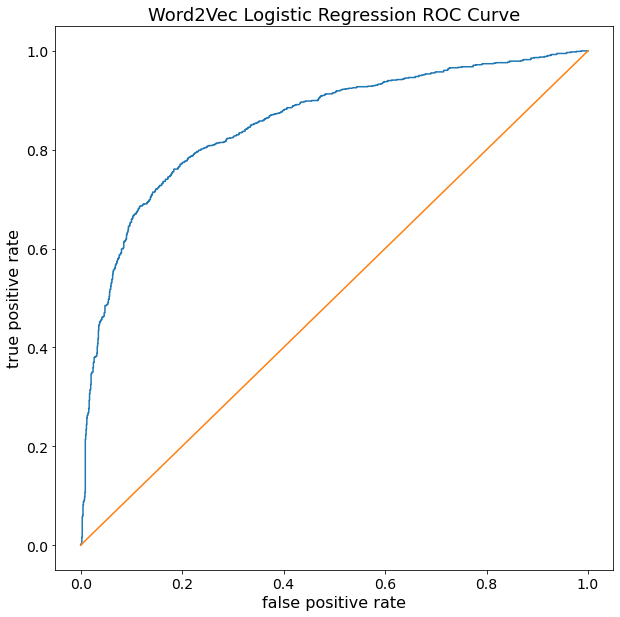

In [ ]:
fig_1 = plt.figure(figsize=(10,10))
plt.plot(roc_curve_lr[0], roc_curve_lr[1])
plt.plot([0,1], [0,1])
# plt.plot(roc_curve_rf[0], roc_curve_lr[1])
# plt.plot(roc_curve_xgb[0], roc_curve_xgb[1])
plt.title("Word2Vec Logistic Regression ROC Curve", fontsize=18)
plt.xlabel('false positive rate', fontsize=16)
plt.ylabel('true positive rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# GloVe model Using Spacy

In [ ]:
# download large GloVe model
# !python -m spacy download en_vectors_web_lg

In [ ]:
# Load GloVe model
GloVe_nlp = spacy.load('en_vectors_web_lg')

In [ ]:
# tokenize training tweets with trained GloVe model
glove_trained_tweet_tokens = []
for tweet in train_corpus:
  glove_trained_tweet_tokens.append(GloVe_nlp(tweet))

In [ ]:
# tokenize testing tweets with trained GloVe model
glove_test_tweet_tokens = []
for tweet in test_corpus:
  glove_test_tweet_tokens.append(GloVe_nlp(tweet))

In [ ]:
# vectorize training tokens
glove_trained_tweet_vectors = []
for token in glove_trained_tweet_tokens:
  glove_trained_tweet_vectors.append(token.vector)

In [ ]:
# vectorize test tokens
glove_test_tweet_vectors = []
for token in glove_test_tweet_tokens:
  glove_test_tweet_vectors.append(token.vector)

In [ ]:
glove_trained_tweet_vectors[:2]

In [ ]:
glove_test_tweet_vectors[:2]

#Embedding: GLoVE, Classifier: Logistic Regression

In [ ]:
# fit data to logistic regression
glove_lr = LogisticRegression(n_jobs=-1).fit(glove_trained_tweet_vectors, y_train_split)

In [ ]:
# find score of training data and test data
glove_lr_train_score = glove_lr.score(glove_trained_tweet_vectors, y_train_split)
glove_lr_test_score = glove_lr.score(glove_test_tweet_vectors, y_test_split)

In [ ]:
# print staticically relevant data
print('train score = ', glove_lr_train_score)
print('test score = ', glove_lr_test_score)
print(classification_report(y_test_split, glove_lr.predict(test_tweet_vectors)))

train score =  0.8151623193844999
test score =  0.7942206654991243
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1318
           1       0.77      0.73      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.79      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [ ]:
# With hyper tuned parameters
dist = dict(C=uniform(loc=0, scale=4),solver =['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], max_iter= np.linspace(100, 1000, num=10))
rdm_mdl_glove_lr = RandomizedSearchCV(glove_lr, dist, random_state = 61, verbose = 3, n_jobs=-1)

rdm_mdl_glove_lr_search = rdm_mdl_glove_lr.fit(train_tweet_vectors, y_train_split)
print(rdm_mdl_glove_lr_search.best_params_)

rdm_mdl_glove_lr_test_score = rdm_mdl_glove_lr_search.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_glove_lr_test_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.7s finished


{'C': 0.1594926960689973, 'max_iter': 600.0, 'solver': 'lbfgs'}
0.8007880910683012


In [ ]:
# print staticically relevant data
print(classification_report(y_test_split, rdm_mdl_glove_lr_search.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1318
           1       0.78      0.73      0.76       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



In [ ]:
# find confidence scores for roc curve
glove_conf_scores = rdm_mdl_glove_lr_search.decision_function(test_tweet_vectors)

In [ ]:
# Obtain roc curve
glove_roc_curve_lr = roc_curve(y_test_split, glove_conf_scores)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

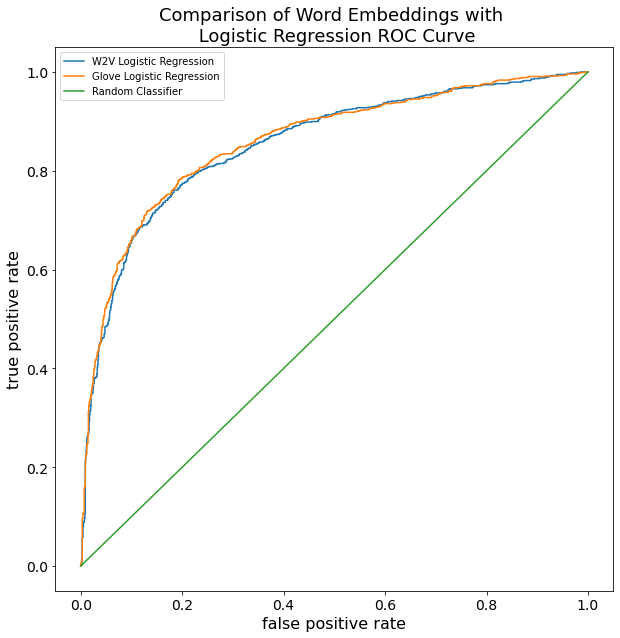

In [ ]:
fig_1 = plt.figure(figsize=(10,10))
plt.plot(roc_curve_lr[0], roc_curve_lr[1], label= "W2V Logistic Regression")
plt.plot(glove_roc_curve_lr[0], glove_roc_curve_lr[1], label= "Glove Logistic Regression")
plt.plot([0,1], [0,1], label= "Random Classifier")
plt.legend()
# plt.plot(roc_curve_rf[0], roc_curve_lr[1])
# plt.plot(roc_curve_xgb[0], roc_curve_xgb[1])
plt.title("Comparison of Word Embeddings with \n Logistic Regression ROC Curve", fontsize=18)
plt.xlabel('false positive rate', fontsize=16)
plt.ylabel('true positive rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Embedding: GloVe, Classifier: Random Forest

In [ ]:
# fit classifier to trained model
glove_rf = RandomForestClassifier(n_jobs=-1).fit(glove_trained_tweet_vectors, y_train_split)

In [ ]:
# Obtain score for train data and test data
glove_rf_train_score = glove_rf.score(glove_trained_tweet_vectors, y_train_split)
glove_rf_test_score = glove_rf.score(glove_test_tweet_vectors, y_test_split)

In [ ]:
# find statistically relevant data
print('train score = ', glove_rf_train_score)
print('test score = ', glove_rf_test_score)
print(classification_report(y_test_split, glove_rf.predict(test_tweet_vectors)))

train score =  0.9885531994745731
test score =  0.809106830122592
              precision    recall  f1-score   support

           0       0.79      0.90      0.85      1318
           1       0.84      0.68      0.75       966

    accuracy                           0.81      2284
   macro avg       0.82      0.79      0.80      2284
weighted avg       0.81      0.81      0.81      2284



In [ ]:
# Hyper tune parameters
glove_rf_dist = dict(n_estimators = randint(1,200), max_features =['sqrt', 'log2'], max_depth=[np.linspace(20, 200, num=10), np.logspace(2, 3, base=2)], min_samples_split=[np.linspace(20, 200, num=10), np.logspace(2, 3, base=2)])

rdm_mdl_glove_rf = RandomizedSearchCV(glove_rf, w2v_rf_dist, random_state= 1708, verbose=3, n_jobs =-1)

rdm_mdl_glove_rf_srch = rdm_mdl_glove_rf.fit(train_tweet_vectors, y_train_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


In [ ]:
# find best tuning parameters
print(rdm_mdl_glove_rf_srch.best_params_)

{'max_features': 'log2', 'n_estimators': 199}


In [ ]:
# find accuracy of tuned model
rdm_mdl_glove_rf_test_score =rdm_mdl_glove_rf_srch.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_glove_rf_test_score)

0.8169877408056042


In [ ]:
# find statistically relevant data
print(classification_report(y_test_split, rdm_mdl_glove_rf_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1318
           1       0.86      0.67      0.76       966

    accuracy                           0.82      2284
   macro avg       0.83      0.80      0.81      2284
weighted avg       0.82      0.82      0.81      2284



#Embedding: GloVe, Classifier: XGBoost

In [ ]:
# load XGBoost classifier
glove_xgb = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)

In [ ]:
# convert list of list to np array of fit the model
glove_trained_tweet_vectors = np.asarray(glove_trained_tweet_vectors)
glove_xgb = glove_xgb.fit(glove_trained_tweet_vectors, y_train_split)

In [ ]:
# find statistically relevant data
glove_xgb_train_score = glove_xgb.score(glove_trained_tweet_vectors, y_train_split)
glove_xgb_test_score = glove_xgb.score(glove_test_tweet_vectors, y_test_split)

In [ ]:
print('train score = ', glove_xgb_train_score)
print('test score = ', glove_xgb_test_score)
print(classification_report(y_test_split, glove_xgb.predict(test_tweet_vectors)))

train score =  0.8693938825295553
test score =  0.8213660245183888
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1318
           1       0.82      0.74      0.78       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.81      2284
weighted avg       0.82      0.82      0.82      2284



In [ ]:
# Hypertune parameters
rdm_mdl_glove_xgb_dist = dict(n_estimators = randint(1,300), learning_rate = uniform(loc=0.05, scale=.5))
rdm_mdl_glove_xgb = RandomizedSearchCV(glove_xgb, rdm_mdl_glove_xgb_dist, random_state=1708, verbose=3, n_jobs =-1)

rdm_mdl_glove_xgb_srch = rdm_mdl_glove_xgb.fit(train_tweet_vectors, y_train_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.3min finished


In [ ]:
# Find best tuned parameters
print(rdm_mdl_glove_xgb_srch.best_params_)

{'learning_rate': 0.12712354107224427, 'n_estimators': 292}


In [ ]:
# score with the tuned model
rdm_mdl_glove_xgb_test_score =rdm_mdl_glove_xgb.score(test_tweet_vectors, y_test_split)
print(rdm_mdl_glove_xgb_test_score)

0.8248686514886164


In [ ]:
# Find statistically relevant data
print(classification_report(y_test_split, rdm_mdl_glove_xgb_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1318
           1       0.82      0.75      0.78       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.82      2284
weighted avg       0.82      0.82      0.82      2284



#Handling Out Of Vocabulary Words

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
from scipy.stats import randint

from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_punctuation,strip_multiple_whitespaces,remove_stopwords
from gensim.corpora import Dictionary

import xgboost as xgb

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
import pickle

# Getting back the objects:
with open('w2v_features.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    test_tweet_matrix, train_tweet_matrix, y_train_split, y_test_split = pickle.load(f)


## DL Classifier from W2V Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train =train_tweet_matrix
X_test =test_tweet_matrix
y_train =y_train_split
y_test =y_test_split

print('Train X and y', X_train.shape, y_train.shape)
print('Test X and y', X_test.shape, y_test.shape)

In [ ]:
#---------------- No scaling gives better results
X_train_scaled =X_train
X_test_scaled =X_test

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
y_train_categorical.shape

### Create DL model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=300))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
#fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,  #60,
    shuffle=True,
    verbose=2,
    validation_split=0.15
)

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=3)
print(
    f"RESULTS - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

In [ ]:
model.evaluate(X_test_scaled, y_test_categorical, verbose=1)

In [ ]:
## ---------- Pred Rate, Prec Rate, F1 score

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

y_pred1 = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
y_test1 = y_test

print('ACC: ', accuracy_score(y_test1, y_pred))

print('RE: ', recall_score(y_test1, y_pred , average="macro"))
print('PR: ', precision_score(y_test1, y_pred , average="macro"))
print('F1: ', f1_score(y_test1, y_pred , average="macro"))

## Hyperas ... for hyperparams optimization

In [ ]:
def data():
    with open('w2v_features.pkl', 'rb') as f:  
        test_tweet_matrix, train_tweet_matrix, y_train_split, y_test_split = pickle.load(f)
        
    X_train =train_tweet_matrix
    X_test =test_tweet_matrix
        
    # Step 1: Label-encode data set
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train_split)
    encoded_y_train = label_encoder.transform(y_train_split)
    encoded_y_test = label_encoder.transform(y_test_split)

    # Step 2: Convert encoded labels to one-hot-encoding
    y_train_categorical = to_categorical(encoded_y_train)
    y_test_categorical = to_categorical(encoded_y_test)

    y_train =y_train_categorical
    y_test =y_test_categorical 
    
    X_scaler = StandardScaler().fit(X_train)
    
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_train
    y_test_scaled = y_test

    x_train = X_train_scaled
    x_test = X_test_scaled
    y_train = y_train_scaled
    y_test = y_test_scaled
   
    return x_train, y_train, x_test, y_test

In [ ]:
from hyperopt import Trials, STATUS_OK, tpe
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
from hyperas import optim
from hyperas.distributions import choice, uniform
from keras import backend as K
from keras.utils import print_summary
          
              
def create_model(x_train, y_train, x_test, y_test):
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)
    
    model= Sequential() 
    model.add(Dense( {{choice([50,100,500])}} , activation='relu', input_dim=300))
    model.add(Dense( {{choice([50,100,500])}} , activation='relu'))
    model.add(Dense(units=2, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   
    print_summary(model, line_length=None, positions=None, print_fn=None)
    result= model.fit(x_train, y_train,
                      batch_size={{choice([64,128])}},
                      epochs={{choice([10,50,100])}},
                      verbose=2,
                      validation_split =0.15)
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy = score[1]
  #  return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}
    return {'loss': accuracy, 'status': STATUS_OK, 'model': model}

best_run, best_model= optim.minimize(model=create_model,
                                     data=data,
                                     algo=tpe.suggest,
                                     max_evals=5,
                                     trials=Trials(),
                                     notebook_name='Disaster_Tweets_hyperasW2VDL')
